<a href="https://colab.research.google.com/github/nakaroov/Brasileirao2020/blob/main/BR2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np #cálculos em Arrays Multidimensionais

# Carregar Dataframe

In [47]:
Tbl = pd.read_excel('/content/drive/My Drive/a/BR2020.xlsx')
BR = []

# Nova seção

##Obtem todos os clubes 

In [48]:
clubes  =  pd.concat([Tbl['Clube1'].str.lower(), Tbl['Clube2'].str.lower()], axis=1, keys=['Clubes'])
clubes  =  pd.Series(clubes['Clubes'].unique(), name="Clubes")
clubes =  clubes.to_frame()
clubes

,Clubes
0,fortaleza
1,coritiba
2,sport
3,santos
4,flamengo
5,gremio
6,rb bragantino
7,atletico-mg
8,athletico
9,bahia


In [49]:
TbMandante = clubes[["Clubes"]].copy()

## FUNÇÕES

In [65]:
def getDraw(data, clube ): #Empates
    df = data[(UmDois) & (Draw)]
    empates = df['Vencedor'].count().astype(int)
    return empates.astype(np.int64)
    
def getPoints(data, clube ):

    Win = data["Vencedor"].str.lower() == clube
    filter4 = (data["Clube1"].str.lower() == clube) | (data["Clube2"].str.lower() == clube)
    Visitante = data[(Away) & (Win)]
    Visitante = Visitante['Vencedor'].count() 
    E = data[(filter4) & (Draw)]
    E = E['Vencedor'].count()
    return ((Visitante*3)+(Mandante*3)+E)

def getWinner(data, clube ): #Vitorias
  return (data[Win]['Vencedor'].count()).astype(int)

def gols (Tbl, c1):
  sem_carro = Tbl.loc[Tbl['Clube1'].str.lower() == c1]
  nao_carro = pd.DataFrame(sem_carro['Clube1Gols'])
  golsf = Tbl.loc[Tbl['Clube2'].str.lower() == c1]
  gf = pd.DataFrame(golsf['Clube2Gols'])
  gpc = nao_carro.Clube1Gols.sum().astype(int)
  gpf = gf.sum().astype(int)
  return (gpc + gpf)


def golsc (Tbl, c1):
  sem_carro = Tbl.loc[Tbl['Clube1'].str.lower() == c1]
  nao_carros = pd.DataFrame(sem_carro['Clube2Gols'])
  golsf = Tbl.loc[Tbl['Clube2'].str.lower() == c1]
  gf = pd.DataFrame(golsf['Clube1Gols'])
  gpc = nao_carros.Clube2Gols.sum().astype(int)
  gpf = gf.Clube1Gols.sum().astype(int)
  return (gpc + gpf)

def HTPro (Tbl, c1):
  sem_carro = Tbl.loc[Tbl['Clube1'].str.lower() == c1]
  nao_carros = pd.DataFrame(sem_carro['GOLSMHT'])
  golsf = Tbl.loc[Tbl['Clube2'].str.lower() == c1]
  gf = pd.DataFrame(golsf['GOLSAHT'])
  gpc = nao_carros.GOLSMHT.sum().astype(int)
  gpf = gf.sum().astype(int)
  return (gpc + gpf)

def HTC (Tbl, c1):
  sem_carro = Tbl.loc[Tbl['Clube1'].str.lower() == c1]
  nao_carros = pd.DataFrame(sem_carro['GOLSAHT'])
  golsf = Tbl.loc[Tbl['Clube2'].str.lower() == c1]
  gf = pd.DataFrame(golsf['GOLSMHT'])
  gpc = nao_carros.GOLSMHT.sum().astype(int)
  gpf = gf.sum().astype(int)
  return (gpc + gpf)


def getDefeats(data, clube ):
    filter1 = (data["Clube1"].str.lower() == clube) | (data["Clube2"].str.lower() == clube)
    filter2 = (data["Vencedor"].str.lower() != clube) & (data["Vencedor"].str.lower() != '-')
    df = data[(filter1) & (filter2)]
    derrotas = df['Vencedor'].count()
    return derrotas.astype(np.int64)

def getDepartures(data, clube ): #Jogos
    return (data[filter1]['Clube1'].count() + data[Away]['Clube2'].count()).astype(np.int64)


# MONTAR TABELA DE ACORDO COM AS FUNÇOES

In [64]:
for index, row in clubes.iterrows():
  c1  =  row['Clubes']
  c1  =  c1.strip()
  Win = Tbl["Vencedor"].str.lower() == c1
  filter1 = Tbl["Clube1"].str.lower() == c1
  Um = (Tbl["Clube1"].str.lower() == c1) &  (Tbl["Vencedor"].str.lower() == '-')
  UmDois = (Tbl["Clube1"].str.lower() == c1) | (Tbl["Clube2"].str.lower() == c1)
  Away = Tbl["Clube2"].str.lower() == c1
  Mandante = Tbl[(filter1) & (Win)]
  Mandante = Mandante['Vencedor'].count()
  Draw = Tbl["Vencedor"].str.lower() == '-'


  p   = getPoints(Tbl,c1)
  j   =  getDepartures(Tbl, c1)
  v   =  getWinner(Tbl, c1 )
  e   =  getDraw(Tbl, c1 )
  d   =  getDefeats(Tbl, c1)
  gp = gols(Tbl, c1)
  gc = golsc(Tbl,c1)
  gpht = HTPro(Tbl, c1)
  gcht = HTC(Tbl, c1)
  sg = gp - gc

  clubes.at[index, 'P']  = p
  clubes.at[index, 'J']  = j
  clubes.at[index, 'V']  = v
  clubes.at[index, 'E']  = e
  clubes.at[index, 'D']  = d
  clubes.at[index, 'GP'] = gp
  clubes.at[index, 'GC'] = gc
  clubes.at[index, 'SG'] = sg
  clubes.at[index, 'GPHT'] = gpht
  clubes.at[index, 'GCHT'] = gcht



AttributeError: ignored

Precisa executar 3 vezes

In [55]:
def Memoria(data):
  data = data.fillna(0)
  data['Clube1'] =  data['Clube1'].astype("category")
  data['Clube1Gols'] =  data['Clube1Gols'].astype("int16")
  data['Clube2'] =  data['Clube2'].astype("category")
  data['Clube2Gols'] =  data['Clube2Gols'].astype("int16")
  data['GPHT'] =  data['GPHT'].astype("int16")
  data['GCHT'] =  data['GCVHT'].astype("int16")
  data.info(verbose=False, memory_usage="deep")
  return (data)

In [ ]:
Memoria(Tbl)

# Tabela

In [56]:
clubes = clubes.sort_values(by=['P','V', 'SG'], ascending=False) 
clubes = clubes.reset_index(drop=True)
clubes

,Clubes,P,J,V,E,D,GP,GC,SG,GPHT
0,são paulo,56.0,28.0,16.0,8.0,4.0,46.0,26.0,20.0,20.0
1,atletico-mg,49.0,28.0,15.0,4.0,8.0,46.0,32.0,14.0,21.0
2,flamengo,48.0,28.0,14.0,6.0,7.0,47.0,37.0,10.0,18.0
3,gremio,48.0,28.0,12.0,12.0,4.0,36.0,22.0,14.0,14.0
4,internacional,47.0,28.0,13.0,8.0,6.0,41.0,26.0,15.0,23.0
5,palmeiras,44.0,28.0,12.0,8.0,7.0,36.0,25.0,11.0,16.0
6,fluminense,43.0,28.0,12.0,7.0,9.0,39.0,32.0,7.0,16.0
7,santos,39.0,28.0,10.0,9.0,8.0,38.0,35.0,3.0,22.0
8,corinthians,39.0,28.0,10.0,9.0,8.0,30.0,30.0,0.0,17.0
9,athletico,37.0,28.0,11.0,4.0,13.0,23.0,28.0,-5.0,14.0


# Nova seção

# Nova seção

In [59]:
 Ultimos =Tbl.query('Clube2 == "RB Bragantino" or Clube1 == "RB Bragantino"').head()
 Ultimos.SOMA.sum()

13

In [60]:
Inter = Tbl.query('Clube2 == "RB Bragantino" or Clube1 == "RB Bragantino"')
Inter.Vencedor.value_counts()

-                10
RB Bragantino     8
Gremio            1
Palmeiras         1
Atletico-MG       1
Fortaleza         1
Atletico-GO       1
Bahia             1
Coritiba          1
Athletico         1
Internacional     1
Name: Vencedor, dtype: int64

In [15]:
Tbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Ano                    109 non-null    float64       
 1   HorÃ¡rio               176 non-null    object        
 2   Dia                    239 non-null    object        
 3   Data                   257 non-null    datetime64[ns]
 4   Clube1                 280 non-null    object        
 5   Clube2                 280 non-null    object        
 6   Vencedor               275 non-null    object        
 7   Rodada                 280 non-null    object        
 8   Arena                  109 non-null    object        
 9   Clube1Gols             280 non-null    int64         
 10  Clube2Gols             280 non-null    int64         
 11  Clube 1 BAtado         109 non-null    object        
 12  Clube 2 BAtado         109 non-null    object        
 13  BAtad

# GRAFICOS 

##PONTUAÇÃO

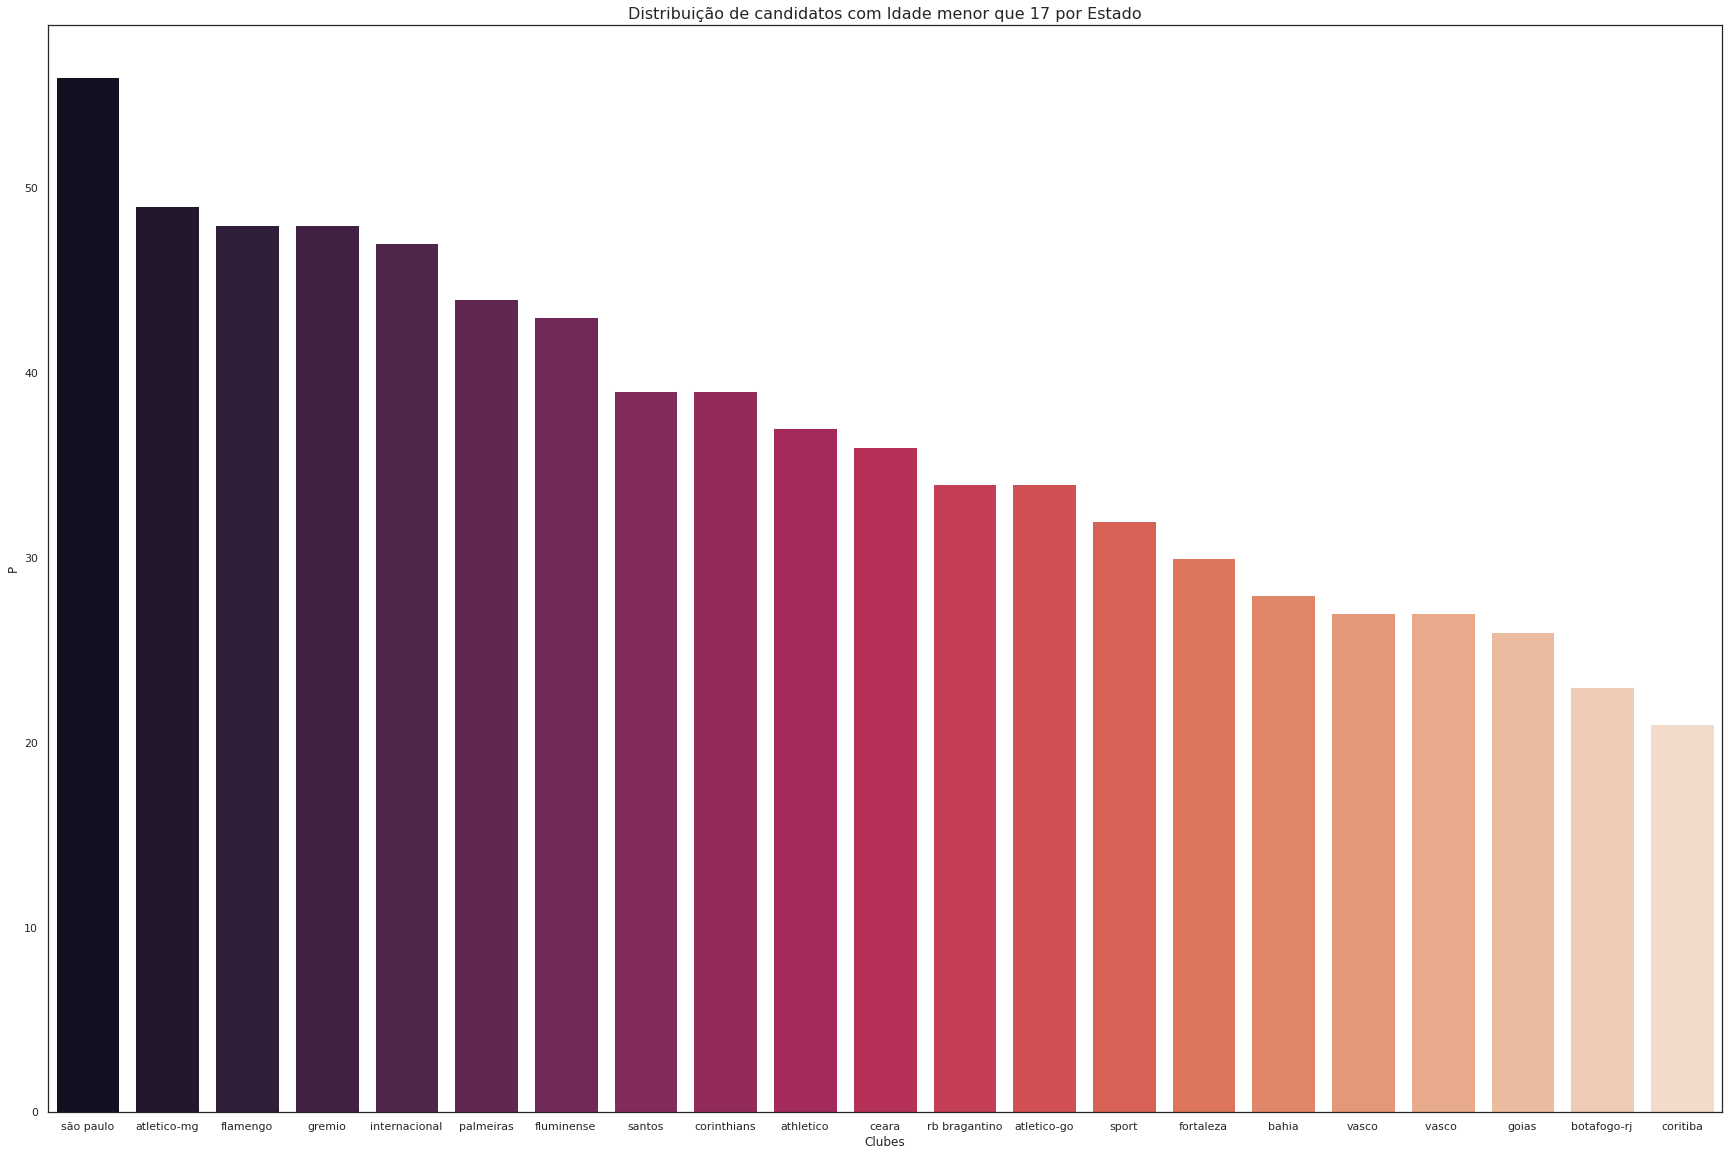

In [16]:
plt.figure(figsize=(30, 20))
sns.set_theme(style="white")
ax = sns.barplot(x=clubes['Clubes'], y = clubes['P'], palette="rocket",
                 data=clubes).set_title('Distribuição de candidatos com Idade menor que 17 por Estado',  fontsize = 16)

In [58]:
Tbl["SOMA"] = Tbl["Clube1Gols"] + Tbl["Clube2Gols"]
Tbl.groupby("Rodada")["SOMA"].mean()

Rodada
01ª Rodada    1.4
02ª Rodada    2.3
03ª Rodada    2.0
04ª Rodada    2.6
05ª Rodada    1.7
06ª Rodada    2.0
07ª Rodada    2.8
08ª Rodada    2.6
09ª Rodada    2.7
10ª Rodada    2.6
11ª Rodada    2.7
12ª Rodada    2.4
13ª Rodada    2.6
14ª Rodada    2.7
15ª Rodada    2.4
16ª Rodada    2.6
17ª Rodada    2.5
18ª Rodada    2.9
19ª Rodada    2.5
20ª Rodada    2.1
21ª Rodada    2.9
22ª Rodada    2.3
23ª Rodada    2.4
24ª Rodada    2.1
25ª Rodada    2.2
26ª Rodada    2.7
27ª Rodada    1.7
28ª Rodada    1.8
Name: SOMA, dtype: float64

## GOLS POR RODADA

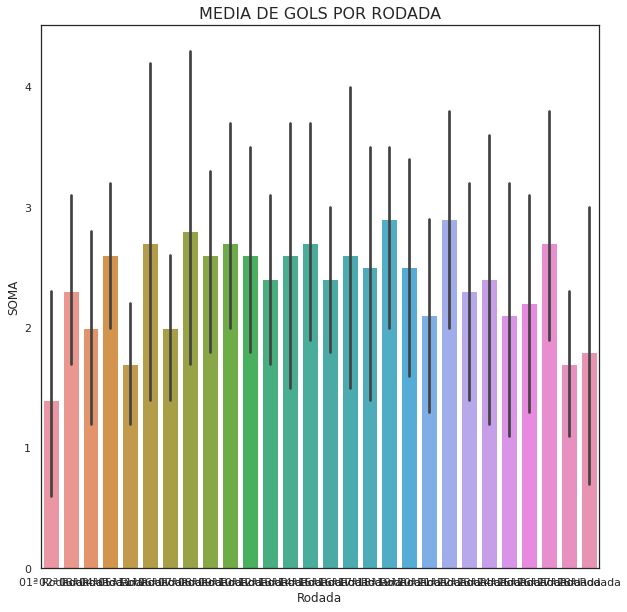

In [18]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="white")
ax = sns.barplot(x=Tbl['Rodada'], y = Tbl['SOMA'],
                 data=Tbl).set_title('MEDIA DE GOLS POR RODADA',  fontsize = 16)

In [19]:
GOLS = Tbl.SOMA.sum()/ (len(Tbl)-6)
GOLS

2.4160583941605838

In [20]:
len(Tbl)

280

In [23]:
HT = Tbl.GOLSMHT.sum() + Tbl.GOLSAHT.sum()
HT

301.0

In [24]:
HT / Tbl.SOMA.sum()

0.45468277945619334

In [31]:
Golos = Tbl.groupby("SOMA")["Rodada"].count()

In [45]:
Golos

SOMA
0    30
1    54
2    72
3    70
4    33
5    10
6     7
7     2
8     2
Name: Rodada, dtype: int64

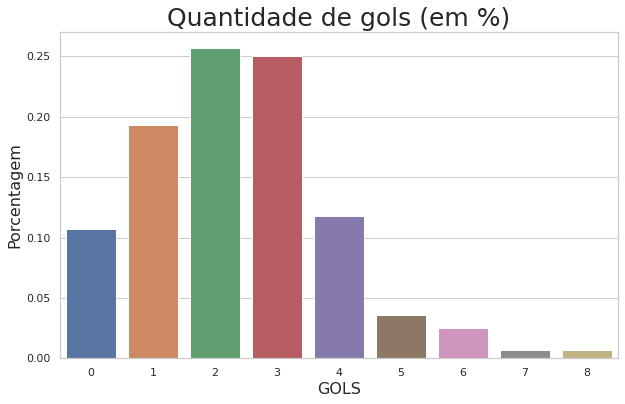

In [99]:
tabela = pd.DataFrame(Tbl['SOMA'].value_counts(normalize=True).sort_index(ascending=True))
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=tabela, x=['0' , '1', '2','3','4','5','6','7','8'], y=tabela['SOMA']  )
ax.set_title('Quantidade de gols (em %)', fontsize=25)
ax.set_xlabel('GOLS', fontsize=16)
ax.set_ylabel('Porcentagem', fontsize=16);

In [98]:
Tbl['SOMA'].value_counts().sort_index(ascending=True)

0    30
1    54
2    72
3    70
4    33
5    10
6     7
7     2
8     2
Name: SOMA, dtype: int64

## OVER 1,5

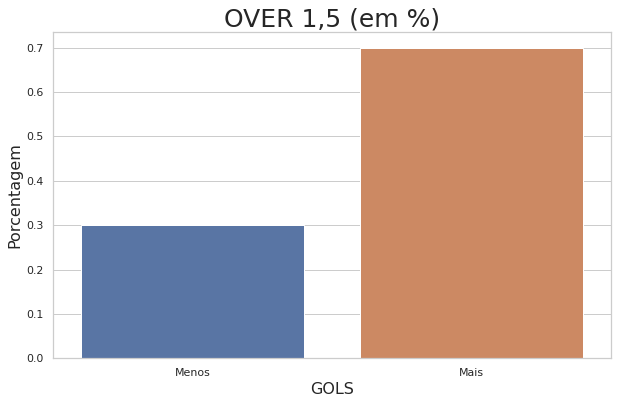

In [131]:
over15 = pd.DataFrame({'SOMA':[Tbl[ Tbl.SOMA <= 1 ]["SOMA"].count() / Tbl["SOMA"].count()
, Tbl[ Tbl.SOMA > 1 ]["SOMA"].count() / Tbl["SOMA"].count()]
                       })
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=tabela, x=['Menos' , 'Mais'], y=over25['SOMA']  )
ax.set_title('OVER 1,5 (em %)', fontsize=25)
ax.set_xlabel('GOLS', fontsize=16)
ax.set_ylabel('Porcentagem', fontsize=16);

In [135]:
1/0.7

1.4285714285714286